# Image processing with Python, NumPy

By reading the image as a NumPy array ndarray, various image processing can be performed using NumPy functions. In this notebook, I will introduce some basic image processing techniques using NumPy.

There exists a lot of image processing library such as `cv2` or `scikit-image`, in this `notebook` we will only use `numpy`.

## Image

You will find the `lena.jpg` image at the same level as this notebook. 

![lena](lena.jpg)

The imageha a shape of **(225, 400, 3)** which means that the image has **225** rows, **400** columns and **3** color channels. The image is in **RGB** format.

<img src="images/doc/three_d_array.png" alt="threedarray" width="500">

## NumPy

We'll use numpy to manipulate the image. The image will be converted to a 3d-ndarray of shape **(225, 400, 3)**.

## Pillow

Pillow is a Python library that allows you to read, write and manipulate images. It is a part of the Python Imaging Library (PIL). We will use it to read the image.

### Instsll Pillow

Open a terminal in the right `conda` environment (*nomades_nppd_310*). Run the following command:
  
```bash
conda install pillow 
```

We will use Pillow to read the image, then the mage will be transformed as a 3d-ndarray of shape **(225, 400, 3)** using this command:

```python
import numpy as np
from PIL import Image
im = np.array(Image.open('./lena.jpg'))
print(im.shape)
# you should see (225, 400, 3) as output
```

## Objectives

**The goal of this exeercise is to understand how to manipulates `NumPy` arrays by performing some easy image processing techniques.**

In [1]:
# Imports
import numpy as np              # Numpy for computing the image as array
from PIL import Image           # PIL for opening the image; install using : conda install -c anaconda pillow
import matplotlib.pyplot as plt # Matplotlib for displaying the image 

In [2]:
def display_image(image: np.ndarray, title: str=None):
    """
    Display the image using matplotlib
    Args:
    image: ndarray: The image as an numpy array
    title: str: The title of the image, default is None
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


##### Open the image as 3D numpy array

In [3]:
# Load the image
im = np.array(Image.open('./lena.jpg'))
print(im.shape)

(225, 400, 3)


##### Display original image

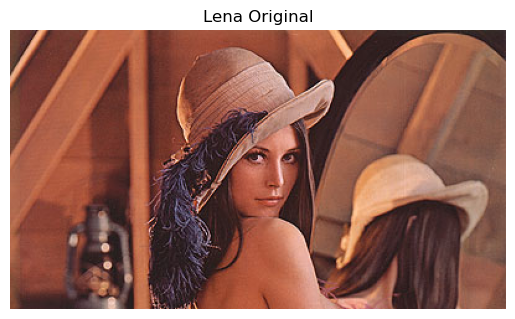

In [4]:
display_image(im, 'Lena Original')

##### Function that save image

In [5]:
def save_image(image: np.ndarray, name: str='lena_copy.jpg'):
    """
    Save the image to the disk
    Args:
    image: ndarray: The image as an numpy array
    """
    im = Image.fromarray(image)
    im.save(name)

### Grayscale

the first function we willl implement is the grayscale effect. The grayscale effect will convert the image to grayscale. To apply the grayscale effect **we need to provide the same value for the three components `r`, `g`, `b`** we will use the following algorithm:
- loop througth the image (row, cols)
- compute the mean of the 3D axis (axis 2) (r/3 + g/3 + b/3)
- set the mean value for each component

##### Example

![grayscale](images/doc/grayscale.png)

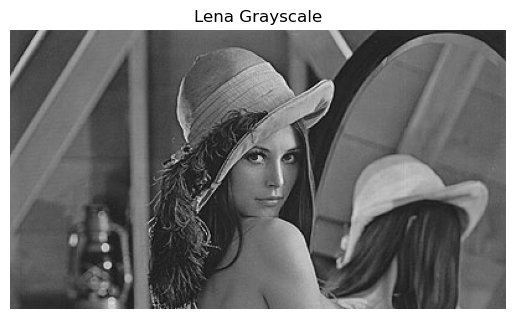

In [18]:
def grayscale(image):
    """
    Convert the image to grayscale
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The grayscale image
    """
    grayscale_image = np.zeros_like(image) # Create an empty array with the same shape as the image
    # grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    # m = np.mean(image, axis=2)
    # print(m)
    # for i in range(image.shape[2]):
    #     grayscale_image[:, :, i] = m
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        r = image[i, j, 0] / 3
        g = image[i, j, 1] / 3
        b = image[i, j, 2] / 3
        m = r + g + b

        grayscale_image[i, j] = [m] * 3
        
    return grayscale_image

lena_grayscale = grayscale(im)
display_image(lena_grayscale, 'Lena Grayscale')

### Lena Red

The goal here is to take only the red componenent of the image. The returned image is still a 3D array where the `blue` and `green` components are set to 0.

##### Example

![red](images/doc/lena_red.png)

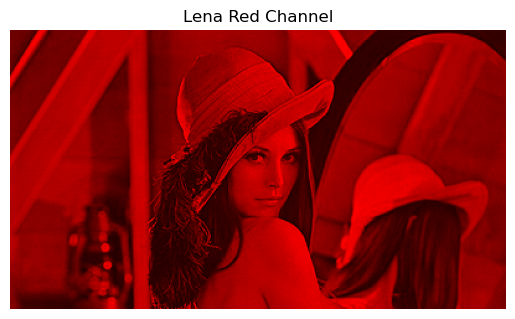

In [25]:
def lena_red(image: np.ndarray):
    """
    Extract the red channel from the image
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The red channel of the image
    """
    red_image = np.zeros_like(image) # Create an empty array with the same shape as the image
    red_image[:, :, 0] = image[:, :, 0]
    red_image = image.copy() # Create an empty array with the same shape as the image
    red_image[:, :, (1,2)] = 0
    return red_image

lred = lena_red(im)
display_image(lred, 'Lena Red Channel')

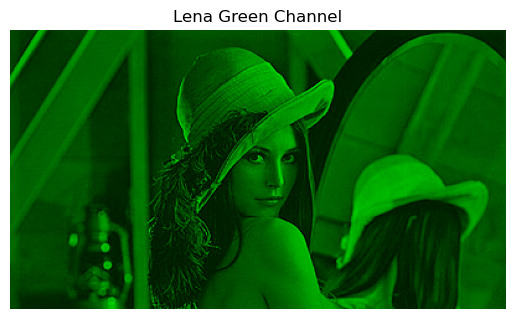

In [21]:
def lena_green(image: np.ndarray):
    """
    Extract the green channel from the image
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The green channel of the image
    """
    red_image = np.zeros_like(image) # Create an empty array with the same shape as the image
    red_image[:, :, 1] = image[:, :, 1]
    return red_image

lgreen = lena_green(im)
display_image(lgreen, 'Lena Green Channel')

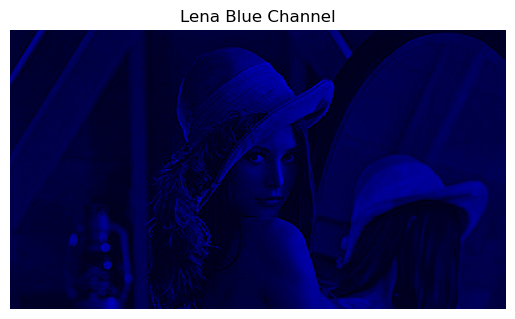

In [22]:
def lena_blue(image: np.ndarray):
    """
    Extract the blue channel from the image
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The blue channel of the image
    """
    red_image = np.zeros_like(image) # Create an empty array with the same shape as the image
    red_image[:, :, 2] = image[:, :, 2]
    return red_image

lblue = lena_blue(im)
display_image(lblue, 'Lena Blue Channel')

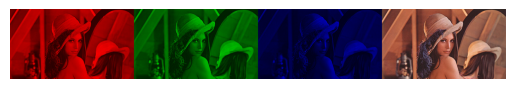

In [26]:
if lred.any() and lgreen.any() and lblue.any():
  display_image(np.concatenate((lred, lgreen, lblue, im), axis=1))


### Negative filter

To create a negative filter we need to change each components by substracting the current componenet to the value `255`. The image will look like this: `[:, :, (255-r), (255-g), (255-b)]`

##### Example

![negative](images/doc/negative.png)

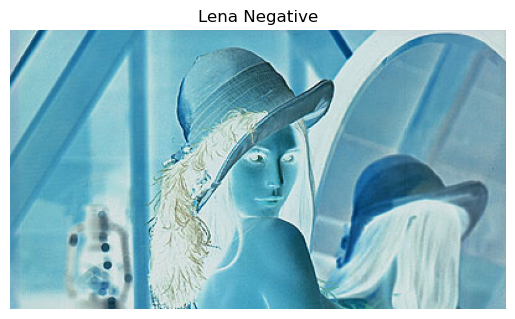

In [31]:
def negative(image: np.ndarray):
    """
    Convert the image to its negative
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The negative of the image
    """
    # im_normalize = image / 255
    # neg_image = 1 - im_normalize
    # return (255 * neg_image).astype(np.uint8)
    return 255 - image

lena_neg = negative(im)
display_image(lena_neg, 'Lena Negative')

### [CADEAU] Color reduction

Cut off the remainder of the division using `//` and multiply again, the pixel values become discrete, and the number of colors can be reduced.

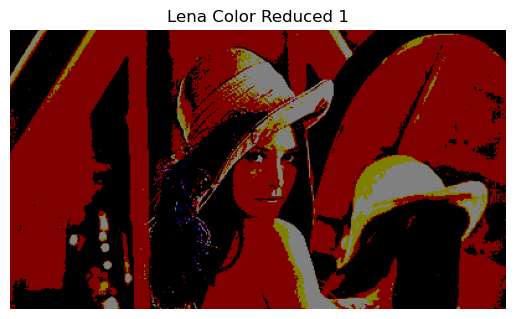

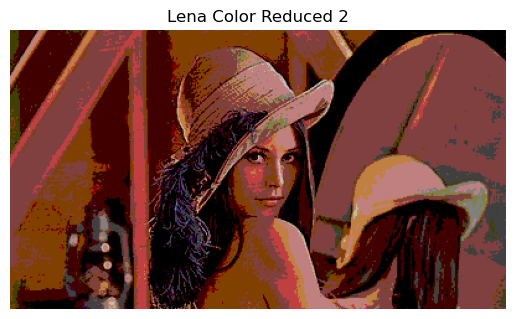

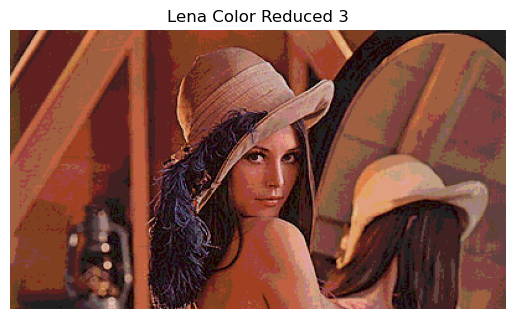

In [32]:
def color_reduced(image: np.ndarray):
    """
    Reduce the number of colors in the image
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    list: three colors image reduced
    """
    return [image // 128 * 128, image // 64 * 64, image // 32 * 32]

for i, c in enumerate(color_reduced(im)):
    display_image(c, f'Lena Color Reduced {i+1}')

### Photomaton

Photomaton function will create a new image whre the first half of the image are even column and the second half of the image are odd column.

##### Example

![photomaton](images/doc/photomaton.png)

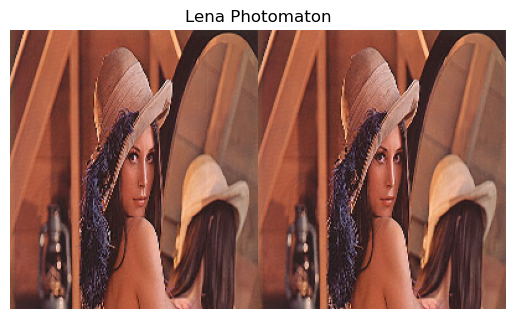

In [39]:
def photomaton(image: np.ndarray):
    """
    Apply the photomaton effect to the image
    
    Args:
    image: ndarray: The image as an numpy array
    Returns:
    ndarray: The image with the photomaton effect
    """
    _, width, _ = image.shape           # Get the width of the image, in this function we don't need the height nor the number of channels
    vertical_copy_image = np.zeros_like(image)  # Create a copy of the image
    # vertical_copy_image[:, :width // 2, :] = image[:, ::2, :]
    # vertical_copy_image[:, width // 2:, :] = image[:, 1::2, :]
    return np.concatenate((image[:, ::2, :], image[:, 1::2, :]), axis=1)
    return vertical_copy_image

lena_photomaton = photomaton(im)
display_image(lena_photomaton, 'Lena Photomaton')

### Trimming with slice

By specifying an area with slice, you can trim it to a rectangle.

##### Example

![trimming](images/doc/trimmed.png)

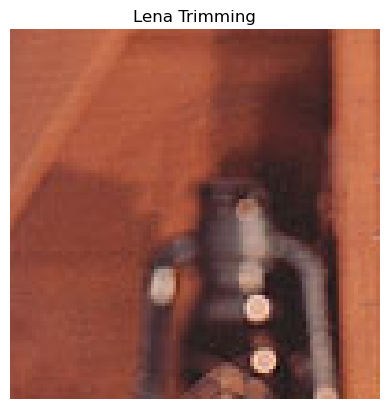

In [41]:
def trimming(image: np.ndarray, x: int, y: int, w: int, h: int):
    """
    Trim the image
    Args:
    image: ndarray: The image as an numpy array
    x0: int: The x coordinate of the top-left corner
    y0: int: The y coordinate of the top-left corner
    w: int: The width of the new image
    h: int: The height of the new image
    Returns:
    ndarray: The trimmed image
    """
    # TODO: Trim the image
    return image[y:y+h, x:x+w]

lena_trimmed = trimming(im, 10, 100, 100, 100)
display_image(lena_trimmed, 'Lena Trimming')

### [CADEAU] Copy and paste



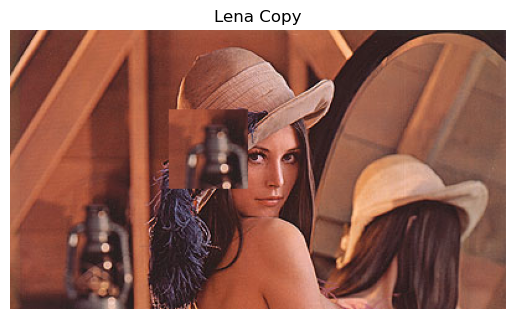

In [42]:
dst_copy = im.copy()
dst_copy[64:128, 128:192] = im[128:192, 32:96]
display_image(dst_copy, 'Lena Copy')

### Rotate

We can rotate the image by 90, 180 or 270 degrees. By default, the image will be rotated by 90 degrees. We'll use the `[numpy.rot90](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html)` function.

##### Example

![rotate](images/doc/rotate.png)

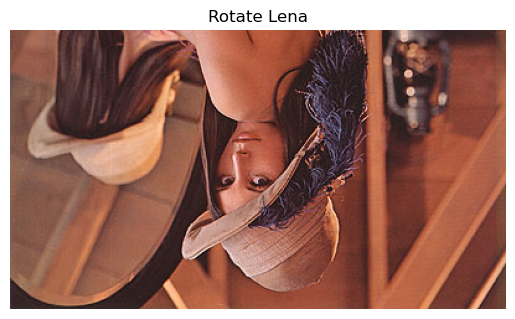

In [47]:
def rotate(image: np.ndarray, angle: float=90):
    """
    Rotate the image using the numpy rot90 function
    The rot90 function rotates the image by steps of 90 degrees
    source: https://numpy.org/doc/stable/reference/generated/numpy.rot90.html
    Args:
    image: ndarray: The image as an numpy array
    angle: float: The angle of rotation, default is 90
    Returns:
    ndarray: The rotated image
    """
    # TODO: Rotate the image using the numpy rot90 function
    return np.rot90(image, k=angle//90)

lena_rotate = rotate(im, 180)
display_image(lena_rotate, "Rotate Lena")

### Blending Two Images

You can blend two images by adding them together. If you add two images, the pixel values will be added together, so if you divide by 2, the average value will be taken.

##### Example

![blending](images/doc/blend.png)

In [ ]:
im2 = np.array(Image.open('./cows.jpg'))

def blend(image1: np.ndarray, image2: np.ndarray, alpha: float=0.5):
    """
    Blend two images
    Args:
    image1: ndarray: The first image as an numpy array
    image2: ndarray: The second image as an numpy array
    alpha: float: The weight of the first image, default is 0.5
    Returns:
    ndarray: The blended image
    """
    if image1.shape != image2.shape:
        return "Error"
    return image1

lena_blend = blend(im, im2, 0.6) # this mean I want 60% of im and 40% of im2
display_image(lena_blend, 'Lena and Cows Blended')

### Display all images

![display](images/doc/all_plots.png)

In [ ]:
imgs = [im, lena_grayscale, lred, lgreen, lblue, lena_neg, lena_photomaton, lena_trimmed, lena_rotate, lena_blend]
titles = ['Lena Original', 'Lena Grayscale', 'Lena Red Channel', 'Lena Green Channel', 'Lena Blue Channel', 'Lena Negative', 'lena photomaton', 'Lena Trimming', 'Lena Rotate', 'Lena and Cows Blended']

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_title(titles[i])
    ax.axis('off')

plt.show()

### Display histograms

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 30))
for i, ax in enumerate(axes.flat):
  if i in range(2, 5):
    img_flat = imgs[i].flatten()
    img_flat = img_flat[img_flat != 0]
  else:  
    img_flat = imgs[i].flatten()
  ax.hist(img_flat, bins=200, range=[0, 256])
  ax.set_title(f"Pixel density: {titles[i]}")
  ax.set_xlabel("Intensity")
  ax.set_ylabel("Number of pixels")

plt.show()


### Optional [CADEAU]

In [ ]:
def vignette_effect(image, strength=1.0):
    height, width, _ = image.shape
    cy, cx = height // 2, width // 2

    y, x = np.ogrid[:height, :width]
    y = y - cy
    x = x - cx

    r = np.sqrt(x**2 + y**2)
    r_max = np.sqrt(cy**2 + cx**2)

    vignette = 1 - r / r_max
    vignette = np.clip(vignette, 0, 1)

    # Apply the vignette effect to each channel
    vignette_effect = np.zeros_like(image)
    for i in range(image.shape[2]):
        vignette_effect[:, :, i] = image[:, :, i] * vignette

    return vignette_effect

lena_vignette = vignette_effect(im, 1.5)
display_image(lena_vignette, 'Lena Vignette')